In [1]:
!pip install fredapi > /dev/null

The system cannot find the path specified.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key =                                                                                                                                                                         'e2ca6c8c7383da4d6c0e44af22a91aba'


In [3]:
fred = Fred(api_key=fred_key)

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-12-29   2023-12-29   
CSUSHPINSA          CSUSHPINSA     2023-12-29   2023-12-29   
SP500                    SP500     2023-12-29   2023-12-29   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-12-29   2023-12-29   
MEHOINUSA672N    MEHOINUSA672N     2023-12-29   2023-12-29   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
MEHOINUSA672N   Real Median Household Income in the United States   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-12-27  Daily, Close   
CSUSHPINSA            1987-01-01      2023-10-01       Monthly   
SP500                 2013-12-30      2023-12-28  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-12-27  Daily, Close   
MEHOINUSA672N         1984-01-01      2022-01-01        Annual   

               frequency_short                           units  \
series id                                                        
BAMLH0A0HYM2                 D                         Percent   
CSUSHPINSA                   M              Index Jan 2000=100   
SP500                        D                           Index   
BAMLH0A0HYM2EY               D                         Percent   
MEHOINUSA672N                A  2022 CPI-U-RS Adjusted Dollars   

                             units_short      seasonal_adjustment  \
series id                                                           
BAMLH0A0HYM2                           %  Not Seasonally Adjusted   
CSUSHPINSA            Index Jan 2000=100  Not Seasonally Adjusted   
SP500                              Index  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                         %  Not Seasonally Adjusted   
MEHOINUSA672N   2022 CPI-U-RS Adjusted $  Not Seasonally Adjusted   

               seasonal_adjustment_short               last_updated  \
series id                                                             
BAMLH0A0HYM2                         NSA  2023-12-28 09:27:07-06:00   
CSUSHPINSA                           NSA  2023-12-26 08:12:02-06:00   
SP500                                NSA  2023-12-28 19:10:59-06:00   
BAMLH0A0HYM2EY                       NSA  2023-12-28 09:26:05-06:00   
MEHOINUSA672N                        NSA  2023-09-12 13:48:02-05:00   

               popularity                                              notes  
series id                                                                     
BAMLH0A0HYM2           93  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA             89  For more information regarding the index, plea...  
SP500                  82  The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY         82  This data represents the effective yield of th...  
MEHOINUSA672N          82  Household data are collected as of March.  As ...

In [6]:
#Inspected data and dropped nulls, doesn't affect the graph much
sp500 = fred.get_series('SP500').dropna()

<Axes: title={'center': 'S&P 500'}>

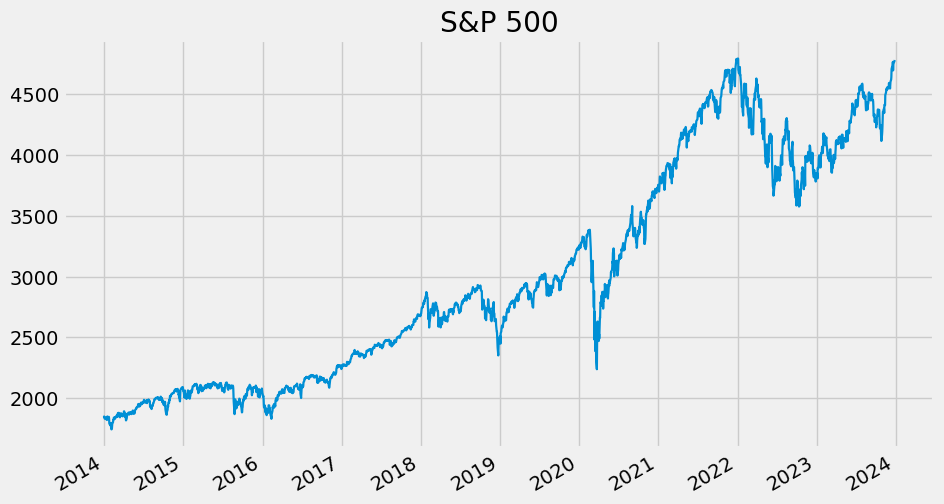

In [7]:
sp500.plot(figsize=(10,6), title='S&P 500', lw=1.6)

In [8]:
unemp_results = fred.search('unemployment')
unemp_results.head()

id realtime_start realtime_end  \
series id                                          
UNRATE        UNRATE     2023-12-29   2023-12-29   
UNRATENSA  UNRATENSA     2023-12-29   2023-12-29   
CCSA            CCSA     2023-12-29   2023-12-29   
CCNSA          CCNSA     2023-12-29   2023-12-29   
NROU            NROU     2023-12-29   2023-12-29   

                                             title observation_start  \
series id                                                              
UNRATE                           Unemployment Rate        1948-01-01   
UNRATENSA                        Unemployment Rate        1948-01-01   
CCSA       Continued Claims (Insured Unemployment)        1967-01-07   
CCNSA      Continued Claims (Insured Unemployment)        1967-01-07   
NROU              Noncyclical Rate of Unemployment        1949-01-01   

          observation_end                frequency frequency_short    units  \
series id                                                                     
UNRATE         2023-11-01                  Monthly               M  Percent   
UNRATENSA      2023-11-01                  Monthly               M  Percent   
CCSA           2023-12-16  Weekly, Ending Saturday               W   Number   
CCNSA          2023-12-16  Weekly, Ending Saturday               W   Number   
NROU           2025-10-01                Quarterly               Q  Percent   

          units_short      seasonal_adjustment seasonal_adjustment_short  \
series id                                                                  
UNRATE              %      Seasonally Adjusted                        SA   
UNRATENSA           %  Not Seasonally Adjusted                       NSA   
CCSA           Number      Seasonally Adjusted                        SA   
CCNSA          Number  Not Seasonally Adjusted                       NSA   
NROU                %  Not Seasonally Adjusted                       NSA   

                        last_updated popularity  \
series id                                         
UNRATE     2023-12-08 07:50:02-06:00         93   
UNRATENSA  2023-12-08 07:49:02-06:00         55   
CCSA       2023-12-28 07:39:04-06:00         74   
CCNSA      2023-12-28 07:39:08-06:00         34   
NROU       2023-08-01 11:01:03-05:00         64   

                                                       notes  
series id                                                     
UNRATE     The unemployment rate represents the number of...  
UNRATENSA  The unemployment rate represents the number of...  
CCSA       Continued claims, also referred to as insured ...  
CCNSA      Continued claims, also referred to as insured ...  
NROU       Starting with the July, 2021 report: An Update...

In [9]:
unrate = fred.get_series('UNRATE')
unrate.isnull().sum()

0

<Axes: >

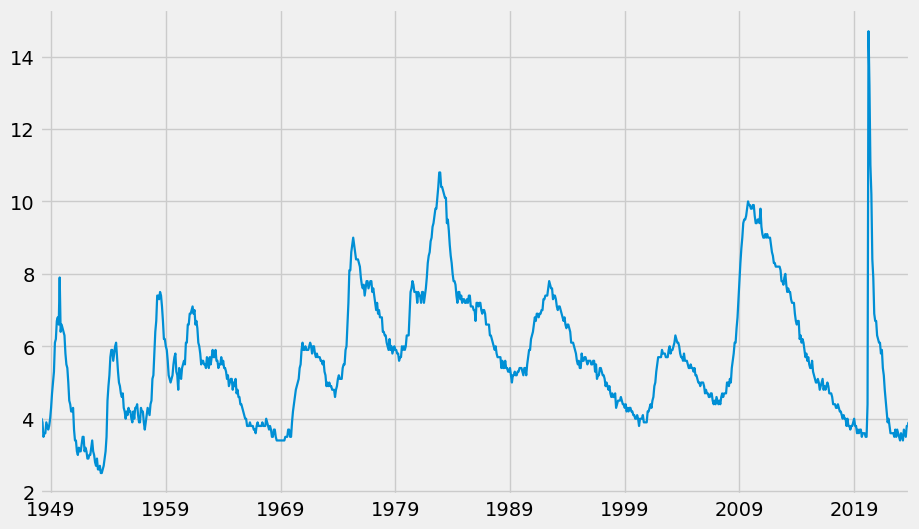

In [10]:
unrate.plot(figsize=(10,6), lw=1.6)

In [11]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['notes'].isna()]
unemp_df.head()

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2023-12-29   2023-12-29  Unemployment Rate in California   
TXUR       TXUR     2023-12-29   2023-12-29       Unemployment Rate in Texas   
NYUR       NYUR     2023-12-29   2023-12-29    Unemployment Rate in New York   
FLUR       FLUR     2023-12-29   2023-12-29     Unemployment Rate in Florida   
OHUR       OHUR     2023-12-29   2023-12-29        Unemployment Rate in Ohio   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2023-11-01   Monthly               M   
TXUR             1976-01-01      2023-11-01   Monthly               M   
NYUR             1976-01-01      2023-11-01   Monthly               M   
FLUR             1976-01-01      2023-11-01   Monthly               M   
OHUR             1976-01-01      2023-11-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   
FLUR       Percent           %  Seasonally Adjusted                        SA   
OHUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2023-12-28 15:24:01-06:00         60  None  
TXUR       2023-12-28 15:23:03-06:00         49  None  
NYUR       2023-12-28 15:23:02-06:00         48  None  
FLUR       2023-12-28 15:24:02-06:00         46  None  
OHUR       2023-12-28 15:23:04-06:00         37  None

In [12]:
#Loop to collect time series data and store in all_results
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(all_results, axis=1).drop([
    'LASMT261982000000003','LASMT391746000000003','CNERUR','CSOUUR','CNEWUR','CWSTUR','CMWRUR','PRUR',  
], axis=1)

In [13]:
unemp_results.dropna(inplace=True)
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', '').to_dict()
unemp_results.columns = [id_to_state[c] for c in unemp_results.columns]
unemp_results = unemp_results.rename(columns={'the District of Columbia':'District Of Columbia'})

In [14]:
#Plot of States Unemployment Rate
px.line(unemp_results, title='Unemployment Rate By State')

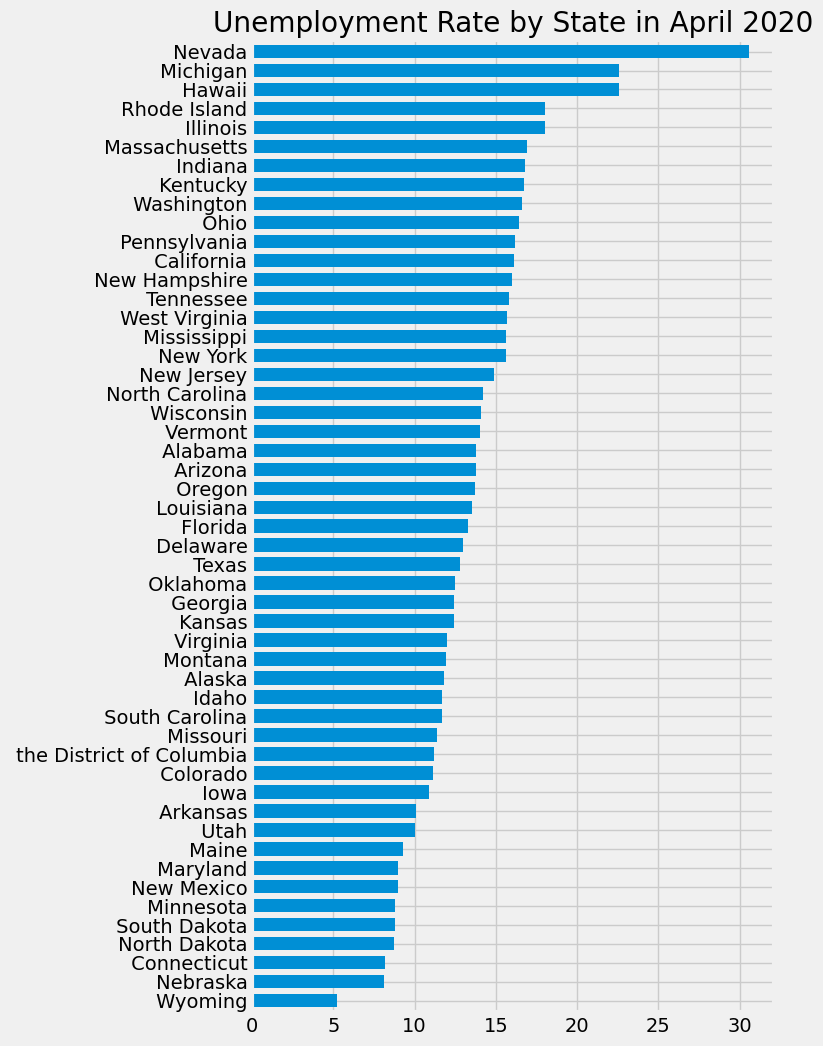

In [15]:
apr2020 = unemp_results.loc[unemp_results.index == '2020-04-01'].T\
    .sort_values('2020-04-01')\
    .plot(kind='barh', figsize=(6,12), width=.7, title='Unemployment Rate by State in April 2020')
apr2020.legend().remove()

In [16]:
#Labor Force Participation Rates
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [17]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


In [18]:
states_of_america = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'District Of Columbia'
]

part_states = part_states[states_of_america]
part_states.dropna(axis=0, inplace=True)
part_states.head()

Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
1976-01-01     57.0    69.0     59.5      57.9        62.6      67.2   
1976-02-01     56.9    68.4     59.2      57.8        62.4      67.0   
1976-03-01     56.8    67.8     59.1      57.7        62.2      66.8   
1976-04-01     56.8    67.9     59.1      57.7        62.2      66.6   
1976-05-01     56.8    67.9     59.1      57.7        62.3      66.5   

            Connecticut  Delaware  Florida  Georgia  Hawaii  Idaho  Illinois  \
1976-01-01         64.2      62.7     55.8     63.7    69.9   63.0      63.0   
1976-02-01         64.1      62.5     55.7     63.6    69.6   62.8      63.0   
1976-03-01         64.0      62.5     55.5     63.5    69.6   62.7      62.9   
1976-04-01         64.1      62.4     55.5     63.5    69.4   62.7      62.9   
1976-05-01         64.3      62.4     55.4     63.6    69.3   62.8      63.0   

            Indiana  Iowa  Kansas  Kentucky  Louisiana  Maine  Maryland  \
1976-01-01     64.0  64.4    65.1      60.5       56.8   62.1      64.3   
1976-02-01     63.9  64.3    65.0      60.3       56.6   61.9      64.2   
1976-03-01     63.8  64.2    64.9      60.2       56.5   61.9      64.1   
1976-04-01     63.8  64.1    65.0      60.1       56.4   61.8      64.1   
1976-05-01     63.9  64.1    65.1      60.1       56.4   61.7      64.1   

            Massachusetts  Michigan  Minnesota  Mississippi  Missouri  \
1976-01-01           64.8      61.6       65.6         58.8      60.5   
1976-02-01           64.7      61.5       65.5         58.6      60.3   
1976-03-01           64.6      61.5       65.4         58.5      60.3   
1976-04-01           64.6      61.6       65.4         58.5      60.4   
1976-05-01           64.6      61.7       65.5         58.5      60.6   

            Montana  Nebraska  Nevada  New Hampshire  New Jersey  New Mexico  \
1976-01-01     62.7      64.9    71.3           65.9        61.5        60.8   
1976-02-01     62.5      64.9    70.8           65.6        61.4        60.5   
1976-03-01     62.4      64.8    70.5           65.6        61.4        60.3   
1976-04-01     62.3      64.8    70.4           65.7        61.5        60.3   
1976-05-01     62.2      64.8    70.5           66.0        61.6        60.3   

            New York  North Carolina  North Dakota  Ohio  Oklahoma  Oregon  \
1976-01-01      58.0            66.5          62.6  61.7      59.3    62.9   
1976-02-01      58.0            66.3          62.4  61.7      59.2    62.7   
1976-03-01      58.0            66.2          62.3  61.7      59.1    62.5   
1976-04-01      58.0            66.2          62.5  61.6      59.0    62.4   
1976-05-01      58.1            66.3          62.6  61.6      59.0    62.5   

            Pennsylvania  Rhode Island  South Carolina  South Dakota  \
1976-01-01          58.4          63.8            65.3          64.6   
1976-02-01          58.3          63.7            65.2          64.4   
1976-03-01          58.3          63.6            65.0          64.4   
1976-04-01          58.3          63.7            64.9          64.3   
1976-05-01          58.3          63.6            64.7          64.3   

            Tennessee  Texas  Utah  Vermont  Virginia  Washington  \
1976-01-01       59.6   63.8  62.8     63.6      65.9        60.9   
1976-02-01       59.4   63.5  62.6     63.4      65.8        60.7   
1976-03-01       59.3   63.4  62.5     63.2      65.6        60.6   
1976-04-01       59.3   63.5  62.5     63.5      65.5        60.6   
1976-05-01       59.4   63.6  62.6     63.6      65.4        60.7   

            West Virginia  Wisconsin  Wyoming  District Of Columbia  
1976-01-01           52.5       65.6     65.3                  64.4  
1976-02-01           52.4       65.5     64.9                  64.5  
1976-03-01           52.3       65.4     64.7                  64.5  
1976-04-01           52.3       65.4     64.9                  64.5  
1976-05-01           52.2       65.5     65.2               

In [20]:
#Note: Each state column name in unemp_results has a space in front of it
unemp_results.columns

Index([' California', ' Texas', ' New York', ' Florida', ' Ohio', ' Illinois',
       ' Pennsylvania', ' Alabama', ' Michigan', ' Georgia', ' Minnesota',
       ' New Jersey', ' Colorado', ' North Carolina', ' Massachusetts',
       ' Arizona', ' Wisconsin', ' Virginia', ' Kentucky', ' Oregon',
       ' Tennessee', ' Iowa', ' New Mexico', ' Nevada', ' Washington',
       ' Louisiana', ' Indiana', ' Arkansas', ' Maryland', ' West Virginia',
       ' Missouri', ' South Carolina', ' Oklahoma', ' Alaska', ' Utah',
       ' Hawaii', ' Mississippi', ' Connecticut', ' Montana', ' North Dakota',
       ' Nebraska', ' Idaho', ' New Hampshire', ' Kansas', ' Maine',
       ' the District of Columbia', ' Delaware', ' Wyoming', ' South Dakota',
       ' Rhode Island', ' Vermont'],
      dtype='object')

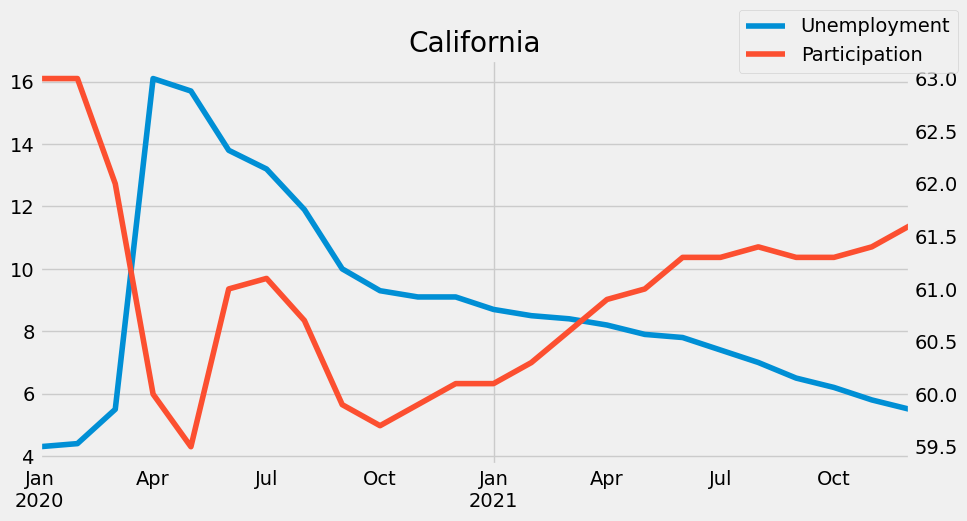

In [23]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
unemp_results2 = unemp_results.asfreq('MS')
l1 = unemp_results2.query('index >= 2020 and index < 2022')[' California'] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')['California'] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title('California')
fig.legend(labels=['Unemployment','Participation'])

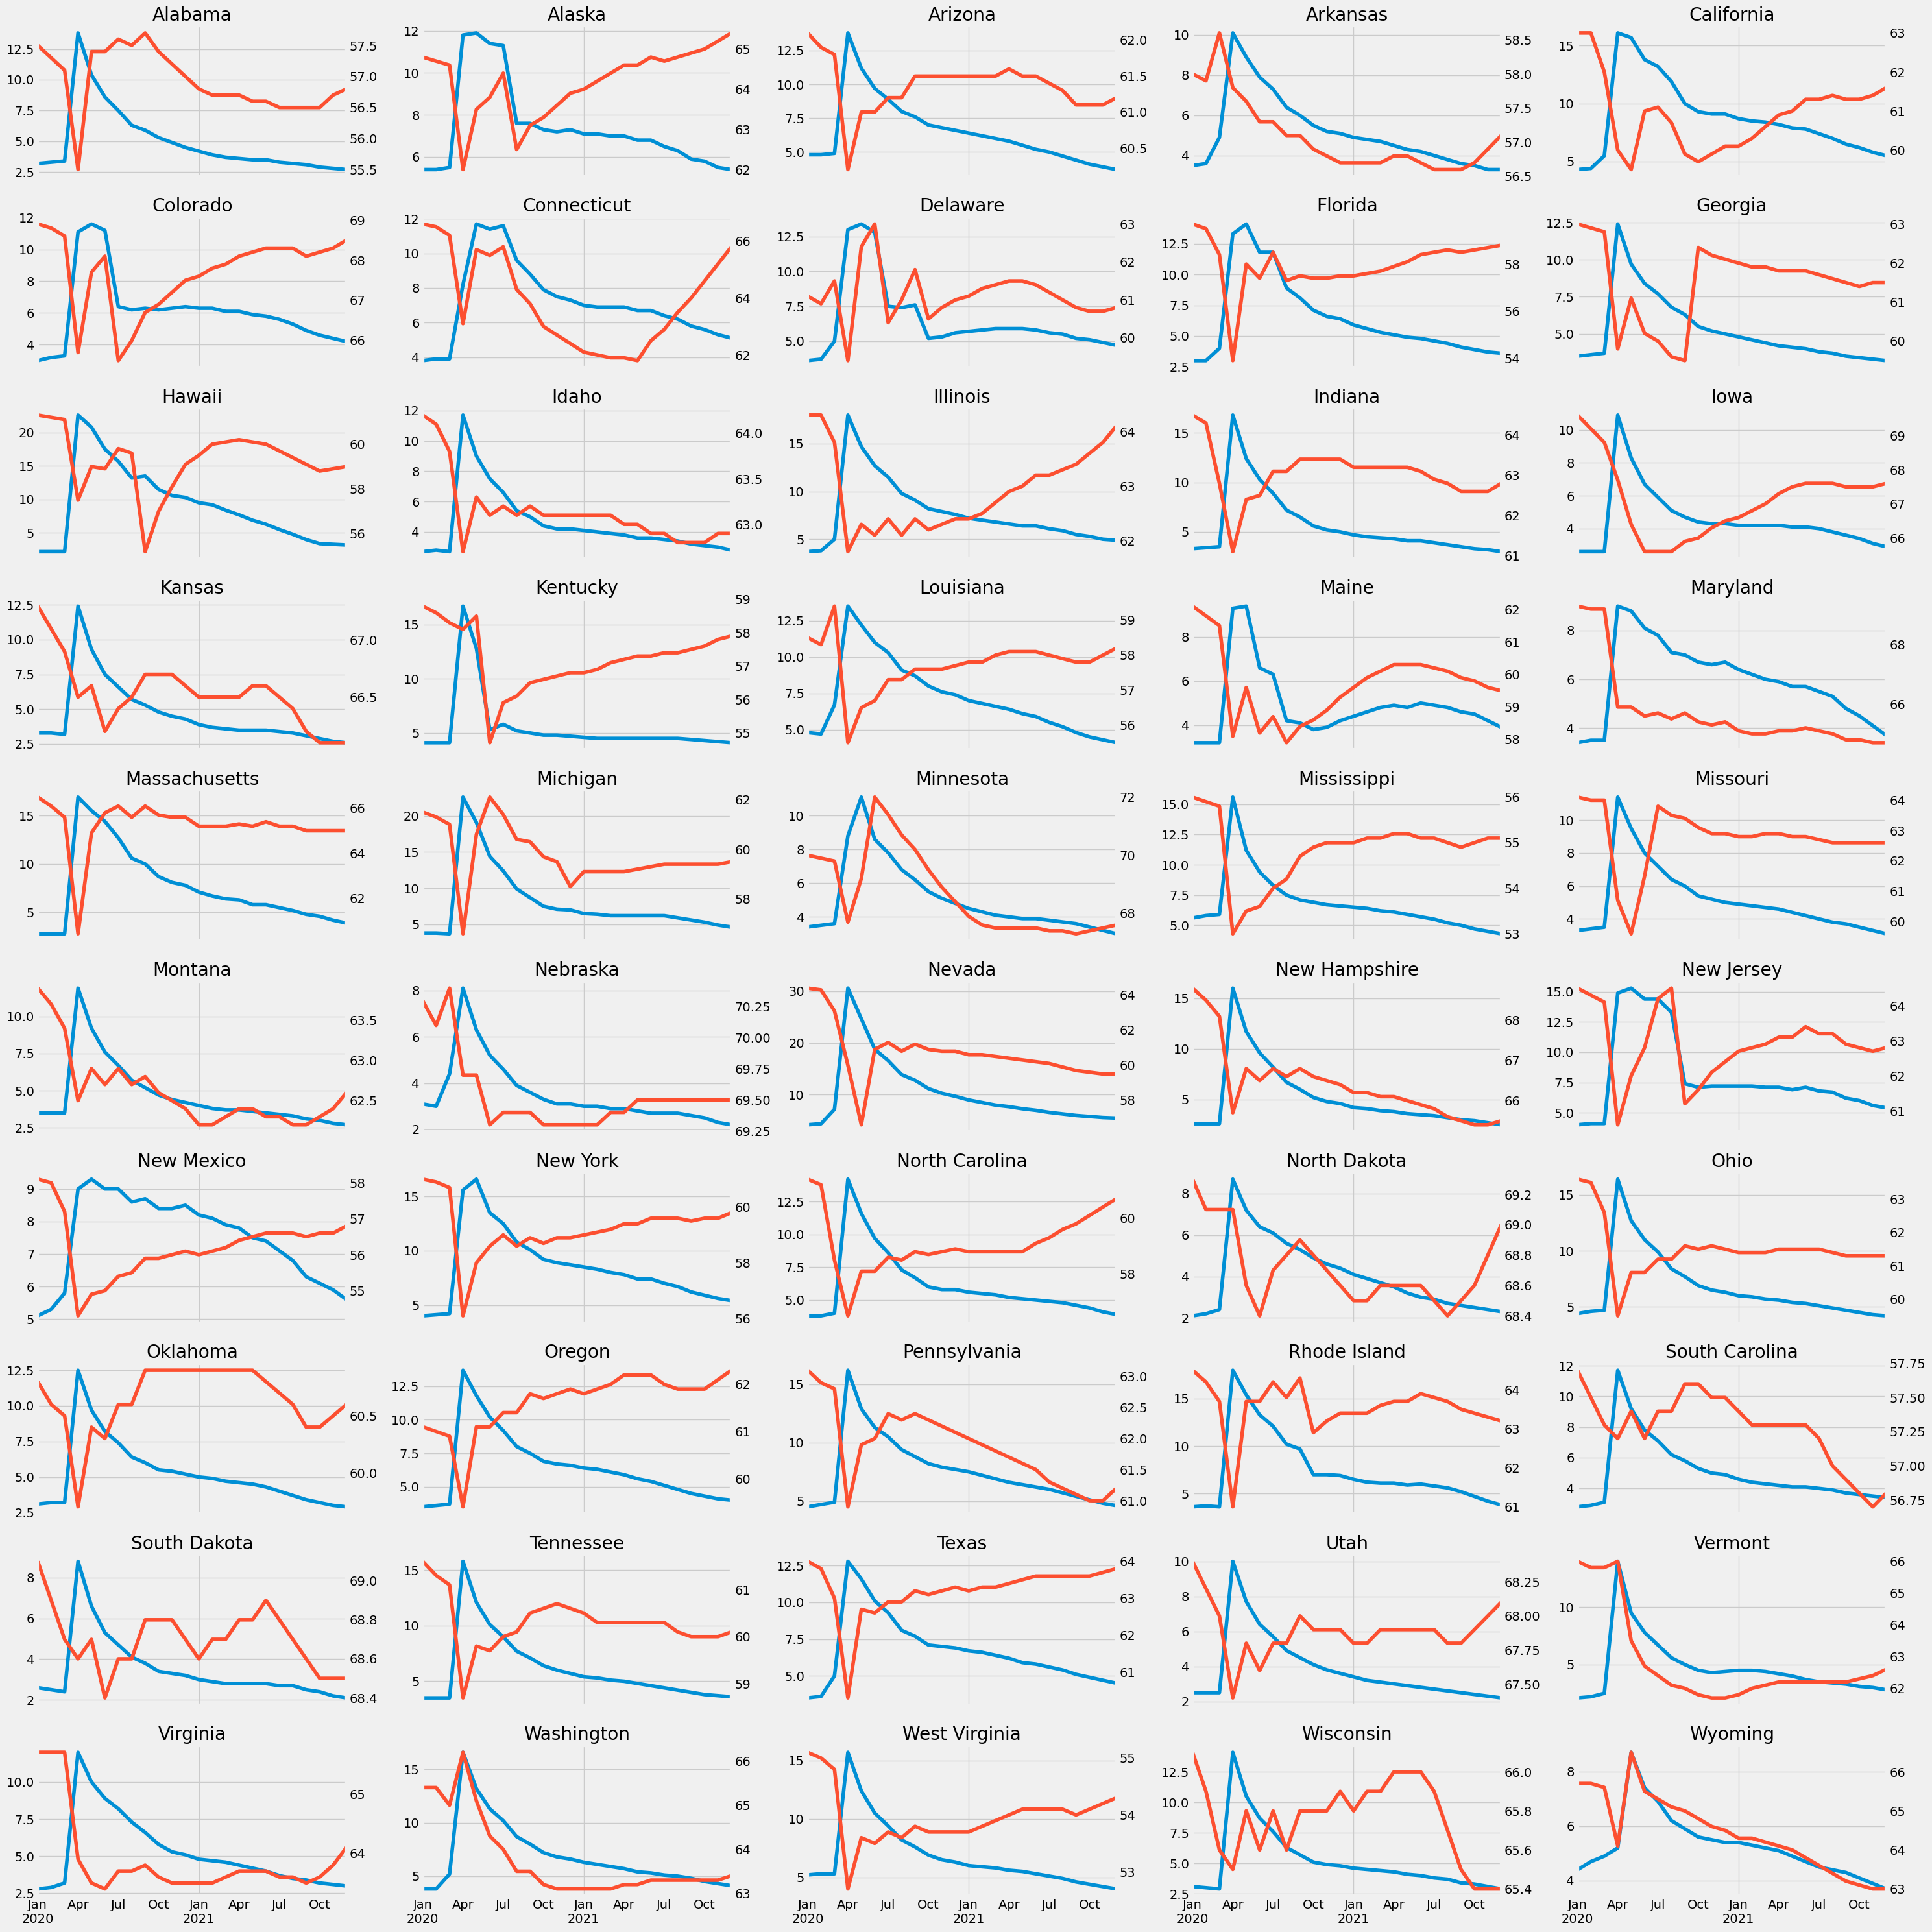

In [31]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in part_states.columns:
    if state in ["District Of Columbia"]:
        continue
    ax2 = axs[i].twinx()
    unemp_results.query('index >= 2020 and index < 2022')[' ' + state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

In [ ]:
#The End :)